Kenneth Flamm
February 2020



---

## Next: Packages and Pandas

In [1]:
import sys                             # system module 
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd                    # data package, redundant since already did
import matplotlib.pyplot as plt               # graphics package, just the part we mainly use
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
# print ('Matplotlib version:',matplotlib.__version__) command not in the pyplot piece of matplotlib
print('Today: ', dt.date.today())

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version:  0.25.1
Today:  2020-02-05


In [2]:
# This is an Jupyter notebook "magic" (IPython) command.  
# It puts plots here in the notebook, rather than  a separate window.
%matplotlib inline    


#### Here's a graphic that tries to explain the difference between a figure, axes, and an axis

![Image](http://sparkandshine.net/wordpress/wp-content/uploads/2016/05/matplotlib_figure_axes_axis.png)

#### We are going to create axes using the matplotlib *subplots* command
#### You can think of "subplots" as simplified axes with particular spatial constraints imposed on them .

In [5]:
gdp  = pd.Series([13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3],name='gdp')
pce  = pd.Series([8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7],name='pce')
year = pd.Series(list(range(2003,2014)),name='year')        # use range for years 2003-2013 
usa = pd.concat([gdp,pce,year],axis=1)
print(type(gdp))

print(type(usa))
usa.index=usa.year
usa.drop(['year'],axis=1, inplace=True) #inplace will remove the column from the dataframe. OTHERWISE IT WONT WORK 
usa

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,gdp,pce
year,,
2003,13271.1,8867.6
2004,13773.5,9208.2
2005,14234.2,9531.8
2006,14613.8,9821.7
2007,14873.7,10041.6
2008,14830.4,10007.2
2009,14418.7,9847.0
2010,14783.8,10036.3
2011,15020.6,10263.5


## Quick review

Take a deep breath.  We've covered a lot of ground, let's take stock.  

We looked at three ways to use Matplotlib:

* Approach #1:  apply plot method to dataframe
* Approach #2:  use `plot(x,y)` function 
* Approach #3:  create `fig, ax` objects, apply plot methods to them

Same result, different syntax.  This is what each of them looks like applied to US GDP: 

```python
usa['gdp'].plot()                   # Approach #1, pandas method 

plt.plot(usa.index, usa['gdp'])      # Approach #2, matplotlib notation 

fig, ax = plt.subplots()           # Approach #3 , object oriented 
ax.plot(usa.index, usa['gdp'])       
```

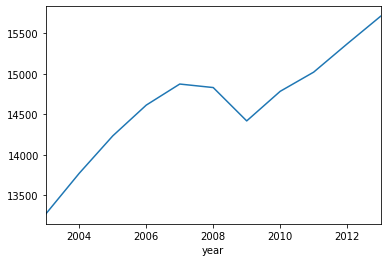

In [6]:
usa['gdp'].plot()

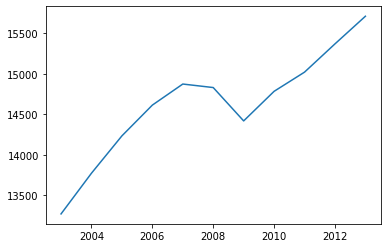

In [5]:
plt.plot(usa.index, usa['gdp'])

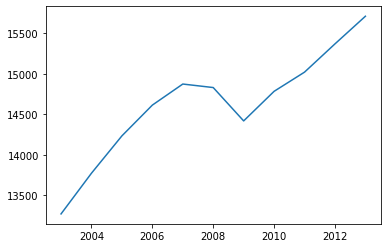

In [6]:
fig, ax = plt.subplots()           # Approach #3 
ax.plot(usa.index, usa['gdp'])

---

---

### More on Indexing: Slicing and Dicing in Pandas

Before we continue, let's look at a few useful ways to index data&mdash;that is, select rows (and columns too).

`.loc` primarily works with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels (e.g., `'a' : 'f'`).

Let's create a `DataFrame` to see how this works. (This is based on an [example](https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/1.%20Data%20Preparation.ipynb) from Chris Fonnesbeck's [Computational Statistics II Tutorial](https://github.com/fonnesbeck/scipy2015_tutorial).)

In [7]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Notice that we create this DataFrame by using a `dict`, where the keys correspond to column names and the values to the data. In this example, we've also set the indices&mdash;strings in this case&mdash;to be the taxon of each bacterium.

In [8]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Now, if we're interested in the values (row) associated with "Actinobacteria," we can use `.loc` and the index name.

In [13]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

This returns the column values for the specified row. Interestingly, we could have also used "positional indexing," even though the indices are strings.

In [12]:
bacteria.iloc[2:3,0:1]

,bacteria_counts
Actinobacteria,569


The difference is that the former returns a `Series` because we selected a single label, while the latter returns a `DataFrame` because we selected a range of positions.

Let's return to our gdp data. Indexing method, `.iloc` works with integer positions. To select specific rows and columns, we can do the following.

In [19]:
bacteria.iloc[1:3,0:2]

,bacteria_counts,other_feature
Proteobacteria,1638,833
Actinobacteria,569,234


In [20]:
usa.iloc[:,0:1]

,gdp
year,
2003,13271.1
2004,13773.5
2005,14234.2
2006,14613.8
2007,14873.7
2008,14830.4
2009,14418.7
2010,14783.8
2011,15020.6


We can also select a range of rows and specify a step value.

In [ ]:
usa

In [21]:
usa.iloc[0:6:2] #the third item is the skip term!

,gdp,pce
year,,
2003,13271.1,8867.6
2005,14234.2,9531.8
2007,14873.7,10041.6


In [15]:
usa.iloc[0:6:2,:] # column selection is implicitly all when only row subset selected

,gdp,pce
year,,
2003,13271.1,8867.6
2005,14234.2,9531.8
2007,14873.7,10041.6


Notice that the iloc method uses typical Pandas indexing conventions, e.g., row 6 is NOT included.

The `.loc` method also works with ranges of row index numbers, where the row numbers are interpreted as the *label* of the index and not the integer position

In [16]:
usa.loc[2003:2007:2]

,gdp,pce
year,,
2003,13271.1,8867.6
2005,14234.2,9531.8
2007,14873.7,10041.6


(Note: Unlike the typical case in Python indexing, the end position with the Pandas `.loc` method **is** included. Therefore, we also see the row associated with the index 2007.)

Indexing is important. You'll use it a lot. Below, we'll show how to index based on data values.

Finally, the `.loc` method also allows some mixed label- or integer-based indexing, which used to be done by a method called `.ix`

It is no longer going to be available in the future. Don't use it.

In [22]:
usa.ix[2003:2007:2, 'pce']

/Users/ethantenison/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/ethantenison/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


year
2003     8867.6
2005     9531.8
2007    10041.6
Name: pce, dtype: float64

In [23]:
usa.loc[2003:2007:2,'pce']

year
2003     8867.6
2005     9531.8
2007    10041.6
Name: pce, dtype: float64

In [24]:
#notice that the iloc method uses typical Pandas/Numpy  indexing conventions, 
# e.g., row 6 and column 2 are NOT included
usa.iloc[0:6:2, 1:2]  

,pce
year,
2003,8867.6
2005,9531.8
2007,10041.6


In [25]:
# notice that row 6 and column 2 ARE included with .loc
usa.loc[2003:2009:2,'pce':'gdp2']  

""
year
2003
2005
2007
2009


In [26]:
usa.loc[:, 'pce']

year
2003     8867.6
2004     9208.2
2005     9531.8
2006     9821.7
2007    10041.6
2008    10007.2
2009     9847.0
2010    10036.3
2011    10263.5
2012    10449.7
2013    10699.7
Name: pce, dtype: float64

Note that we got a Series object back when we selected only one column.

---

In [36]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

Yes, `read_csv()` can take a URL for the file path.

In [37]:
countries.tail(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


This file has lots of useful information. It even has the country names is three different languages.

Let's merge it with some gdp data. The gdp data is located on another web site, in a different format.


Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [38]:
country_names = countries[['country', 'country_group', 'name_en','google_country_code']]
# note that with multiple columns to be selected, you need to put a LIST inside the selection brackets
# You'll get error message if you DON'T put the group of columns in a bracketed list inside the selection brackets

In [39]:
country_names.head(2)

,country,country_group,name_en,google_country_code
0,at,eu,Austria,AT
1,be,eu,Belgium,BE


In [50]:
country_names.columns=['country_code','country_group','country','google_code']
country_names.head()

,country_code,country_group,country,google_code
0,at,eu,Austria,AT
1,be,eu,Belgium,BE
2,bg,eu,Bulgaria,BG
3,hr,non-eu,Croatia,HR
4,cy,eu,Cyprus,CY


We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [51]:
country_names.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany (including  former GDR from 1991)', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Turkey',
       'United Kingdom'], dtype=object)

`pandas` includes an easy-to-use merge function. Let's use it to **merge the two `DataFrame`s on country name.**

Another kind of file Pandas understands is a Stata dataset.

In [52]:
url='https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta' # historical GDP data
df_mad=pd.read_stata(url)
df_mad


,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820.0,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870.0,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913.0,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950.0,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951.0,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012.0,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013.0,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014.0,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015.0,1759.0,1560.0,14230.0,Extrapolated,NaN


In [53]:
df_mad.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

To get a count of the number of unique countries, we can either wrap the above code with len() to get the number of items in the array, or we can use the Series.nunique() method.

In [54]:
len(df_mad.country.unique())

169

In [55]:
# or
df_mad.country.nunique()

169

### Other useful info:
how many observations, by country

In [60]:
df_mad.country.value_counts().head(40)    # get the top 40 countries in terms of number of observations
# if I left off .head(), I would get the entire list

Sweden            719
France            709
Poland            579
Portugal          490
United Kingdom    329
Italy             228
Netherlands       225
Spain             209
Belgium           206
Finland           205
Austria           202
Norway            202
Greece            202
Denmark           202
Ireland           200
Romania           157
Bulgaria          113
Hungary           109
Turkey            108
Luxembourg         67
Czech Republic     67
Slovenia           67
Estonia            67
Latvia             67
Lithuania          67
Malta              67
Slovakia           67
Cyprus             67
Croatia            67
Name: country, dtype: int64

#### Let's merge the two datasets

In [57]:
df_mad=pd.merge(country_names,df_mad,on='country')
df_mad

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,at,eu,Austria,AT,AUT,1.0,NaN,NaN,500.0,NaN,NaN
1,at,eu,Austria,AT,AUT,1000.0,NaN,NaN,700.0,NaN,NaN
2,at,eu,Austria,AT,AUT,1500.0,NaN,NaN,2000.0,NaN,NaN
3,at,eu,Austria,AT,AUT,1600.0,NaN,NaN,2500.0,NaN,NaN
4,at,eu,Austria,AT,AUT,1700.0,NaN,NaN,2500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6059,uk,eu,United Kingdom,GB,GBR,2012.0,35784.0,35185.0,63974.0,Benchmark,ICP PPP estimates
6060,uk,eu,United Kingdom,GB,GBR,2013.0,37702.0,35618.0,64403.0,Benchmark,ICP PPP estimates
6061,uk,eu,United Kingdom,GB,GBR,2014.0,38220.0,36436.0,64890.0,Benchmark,ICP PPP estimates
6062,uk,eu,United Kingdom,GB,GBR,2015.0,38749.0,36941.0,65408.0,Extrapolated,NaN


### Whoa! Anyone notice we went from almost 20,000 rows to just 6000 rows. What happened?

In [59]:
df_mad.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Turkey', 'United Kingdom'], dtype=object)

* what happened to the US?
* what happened to Germany?

In [49]:
pd.merge?

Signature:
pd.merge(
    left,
    right,
    how='inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=('_x', '_y'),
    copy=True,
    indicator=False,
    validate=None,
)
Docstring:
Merge DataFrame or named Series objects with a database-style join.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order.
    * outer: use union of keys from both frame

#### The default type of merge (how = ) is "inner"
![Image](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

You might even need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this.

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` **method** that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

In [64]:
df_mad.head()


,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,at,eu,Austria,AT,AUT,1.0,NaN,NaN,500.0,NaN,NaN
1,at,eu,Austria,AT,AUT,1000.0,NaN,NaN,700.0,NaN,NaN
2,at,eu,Austria,AT,AUT,1500.0,NaN,NaN,2000.0,NaN,NaN
3,at,eu,Austria,AT,AUT,1600.0,NaN,NaN,2500.0,NaN,NaN
4,at,eu,Austria,AT,AUT,1700.0,NaN,NaN,2500.0,NaN,NaN


In [65]:
df_mad.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Turkey', 'United Kingdom'], dtype=object)

To get a count of the **number of unique countries,** we can either wrap the above code with `len()` to get the number of items in the array, or we can use the  `Series.nunique()` method.

In [66]:
print(len(df_mad.country.unique()))
df_mad.country.nunique()

29


29

* we went from 169 countries to 29 countries!

It might be more interesting to know **how many observations** we actually have. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [67]:
df_mad['country'].value_counts()

Sweden            719
France            709
Poland            579
Portugal          490
United Kingdom    329
Italy             228
Netherlands       225
Spain             209
Belgium           206
Finland           205
Austria           202
Norway            202
Greece            202
Denmark           202
Ireland           200
Romania           157
Bulgaria          113
Hungary           109
Turkey            108
Luxembourg         67
Czech Republic     67
Slovenia           67
Estonia            67
Latvia             67
Lithuania          67
Malta              67
Slovakia           67
Cyprus             67
Croatia            67
Name: country, dtype: int64

By default, the `Series` is sorted by values. If you'd like it sorted by index&mdash;country name in this case&mdash;append the `.sort_index()` method. One of the great things about Pandas methods is that you can chain them together, and do all kinds of complex things in a single line of code!

In [68]:
print(type(df_mad['country'].value_counts()))
df_mad['country'].value_counts().sort_index() # country is the index of the series produced by value_counts

<class 'pandas.core.series.Series'>


Austria           202
Belgium           206
Bulgaria          113
Croatia            67
Cyprus             67
Czech Republic     67
Denmark           202
Estonia            67
Finland           205
France            709
Greece            202
Hungary           109
Ireland           200
Italy             228
Latvia             67
Lithuania          67
Luxembourg         67
Malta              67
Netherlands       225
Norway            202
Poland            579
Portugal          490
Romania           157
Slovakia           67
Slovenia           67
Spain             209
Sweden            719
Turkey            108
United Kingdom    329
Name: country, dtype: int64

This can be useful for our analysis. The maximum number of observations for a given European country is 719 observations. We'll note that certain countries, such as Malta, have far less data.

How about finding the **date range** for this data set? Let's look at the minimum and maximum years.

In [70]:
df_mad['year'].min(), df_mad['year'].max()

(1.0, 2016.0)

Notice that when we separate objects with commas, Python creates a tuple implicitly when we evaluate them...you don't have to surround the tuples values with parentheses.

Next, we should pause for a moment and think about what data we really care about. Suppose that for our purposes, the variable of interest is `cgdppc`. The number of observations by country only reflect the number of instances of each country name in the dataset. It is possible, maybe even expected, to have some missing data within those instances. Let's find out **how many cgdppc values are missing.**

In [71]:
df_mad['cgdppc'].isnull().sum()

551

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

What if we'd like to know how many missing values exist at the *country* level? We can take the main part of what we had above and create a new column in the `DataFrame`.

In [72]:
df_mad['n_null'] = df_mad['cgdppc'].isnull()
df_mad.head()

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm,n_null
0,at,eu,Austria,AT,AUT,1.0,NaN,NaN,500.0,NaN,NaN,True
1,at,eu,Austria,AT,AUT,1000.0,NaN,NaN,700.0,NaN,NaN,True
2,at,eu,Austria,AT,AUT,1500.0,NaN,NaN,2000.0,NaN,NaN,True
3,at,eu,Austria,AT,AUT,1600.0,NaN,NaN,2500.0,NaN,NaN,True
4,at,eu,Austria,AT,AUT,1700.0,NaN,NaN,2500.0,NaN,NaN,True


To count the **number of missing values for each country,** we introduce the `.groupby()` method.

In [73]:
df_mad.groupby('country')['n_null'].sum()

country
Austria            50.0
Belgium            27.0
Bulgaria           18.0
Croatia             2.0
Cyprus              0.0
Czech Republic     20.0
Denmark             5.0
Estonia            29.0
Finland            41.0
France              1.0
Greece             17.0
Hungary            13.0
Ireland           101.0
Italy               1.0
Latvia             29.0
Lithuania          29.0
Luxembourg          0.0
Malta               0.0
Netherlands        21.0
Norway             14.0
Poland             17.0
Portugal           13.0
Romania            21.0
Slovakia           35.0
Slovenia            2.0
Spain              31.0
Sweden              2.0
Turkey              1.0
United Kingdom     11.0
Name: n_null, dtype: float64

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by country name&mdash;that's what goes in the parentheses. Next, we need to tell it what column we'd like to perform the `.sum()` operation on. In this case, it's the indicator for whether or not **cgdppc** was missing.

As we saw above, the number of records for each country differs. We might, then, want to have the **missing values by country shown as percentages.** Let's create a new `DataFrame` for this.

We'll take the code from above and set the `as_index` parameter to `False`. When as_index=True the key(s) you use in groupby will become an index in the new dataframe.

In [74]:
cgdppc = df_mad.groupby('country', as_index=False)['n_null'].sum()

In [75]:
cgdppc.head(3)

,country,n_null
0,Austria,50.0
1,Belgium,27.0
2,Bulgaria,18.0


`cgdppc` is a new `DataFrame` with the information from above. It's important to note that using `as_index=False` in `.groupby()` only works if the grouping column(s) are not the same as the columns on which we're performing the operation.

Also, to group by several columns, simply pass in a list of column names to `.groupby()`.

```
df_mad.groupby(['year', 'country_group'])['cgdppc'].mean()
```
Why don't you try it?

How do you interpret the output?

In [76]:
df_mad.groupby(['year', 'country_group'])['cgdppc'].mean()

year    country_group
1.0     eu                1178.166626
        non-eu             984.000000
1000.0  eu                 759.000000
        non-eu             844.000000
1150.0  non-eu             816.000000
                             ...     
2014.0  non-eu           38844.667969
2015.0  eu               33642.000000
        non-eu           39339.332031
2016.0  eu               34106.960938
        non-eu           38935.332031
Name: cgdppc, Length: 946, dtype: float32

Now, let's add the number of observations by country to the DataFrame. First, let's make the English country name the index of the cgdppc dataframe

In [77]:
cgdppc=cgdppc.set_index(['country'])
cgdppc

,n_null
country,
Austria,50.0
Belgium,27.0
Bulgaria,18.0
Croatia,2.0
Cyprus,0.0
Czech Republic,20.0
Denmark,5.0
Estonia,29.0
Finland,41.0


In [78]:
#cgdppc['n_obs'] = cgdppc.groupby('country')['country'].count().values
# line above is another way to do it without resetting index of cgdppc dataframe
cgdppc['n_notna']=df_mad.groupby('country')['country'].count() # counts non-missing values, 
# groupby sets index for result to country
cgdppc

,n_null,n_notna
country,,
Austria,50.0,202
Belgium,27.0,206
Bulgaria,18.0,113
Croatia,2.0,67
Cyprus,0.0,67
Czech Republic,20.0,67
Denmark,5.0,202
Estonia,29.0,67
Finland,41.0,205


Inside baseball, (**More than you need to know**): 
The alternative (commented out) method above does not require resetting the index on the country dataframe.

Let's try it, after recreating the cgdppc dataframe.


In [79]:
cgdppc = df_mad.groupby('country', as_index=False)['n_null'].sum() # creates cgdppc, same as above
cgdppc['n_notna'] = df_mad.groupby('country')['country'].count().values
cgdppc

,country,n_null,n_notna
0,Austria,50.0,202
1,Belgium,27.0,206
2,Bulgaria,18.0,113
3,Croatia,2.0,67
4,Cyprus,0.0,67
5,Czech Republic,20.0,67
6,Denmark,5.0,202
7,Estonia,29.0,67
8,Finland,41.0,205
9,France,1.0,709


Not ending with `values` in the alternative method will result in a column full of NaNs. 

* ## Why don't you try it?

This is because the series index in `df_mad.groupby('country')['country'].count()` is a list of the country names. When creating a new column/variable, pandas tries to match on index, and in this case, it would give up and return us NaNs if we tried to add on a series indexed by country names to a dataframe indexed by integer line numbers. Recall that the default index values for a DataFrame is a sequence of integers.

Because we know (or have noticed) that the .groupby() function returns the values in alphabetical order, we can simply set the new column to the list of values, as we have done by using the values method. The values method strips off the index from a Pandas dataframe or series. You can, however, be more explicit and create another DataFrame and merge on country name, or simply set the index of the original unemployment rate dataframe to country and proceed, as we have done.

Finally, let's create the column for the percentage of missing values.

In [80]:
cgdppc['notna_percentage'] = 100*cgdppc['n_notna'] / (cgdppc.n_null + cgdppc.n_notna)

In [81]:
cgdppc

,country,n_null,n_notna,notna_percentage
0,Austria,50.0,202,80.158730
1,Belgium,27.0,206,88.412017
2,Bulgaria,18.0,113,86.259542
3,Croatia,2.0,67,97.101449
4,Cyprus,0.0,67,100.000000
5,Czech Republic,20.0,67,77.011494
6,Denmark,5.0,202,97.584541
7,Estonia,29.0,67,69.791667
8,Finland,41.0,205,83.333333
9,France,1.0,709,99.859155


This is the second time we've called a `DataFrame` without something like `.head()`. Let's describe what it does. By default, `pandas` prints 60 rows. In this case, because there are only 29 countries, we see the entire `DataFrame`.

As we can see, Croatia has lots of missing data. This `DataFrame` contains useful information&mdash;things to consider&mdash;when analyzing the data.

Suppose we wanted to save this as a .csv file. For this, we'd use the `.to_csv()` method.

In [82]:
cgdppc.to_csv('gdp_missing.csv')

Let's look at our file.

In [83]:
pd.read_csv('gdp_missing.csv').head(5)

,Unnamed: 0,country,n_null,n_notna,notna_percentage
0,0,Austria,50.0,202,80.158730
1,1,Belgium,27.0,206,88.412017
2,2,Bulgaria,18.0,113,86.259542
3,3,Croatia,2.0,67,97.101449
4,4,Cyprus,0.0,67,100.000000


Though it is not obvious, by default this method writes the indexes as a field in the output file. We probably don't want that. Let's edit the code. Let's also be explicit about the type of delimiter we're interested in. (Values can be separated by pipes (`|`), semicolons (`;`), tabs (`\t`), etc.)

In [84]:
cgdppc.to_csv('gdp_missing.csv', index=False, sep=',')

In [85]:
pd.read_csv('gdp_missing.csv').head(5)

,country,n_null,n_notna,notna_percentage
0,Austria,50.0,202,80.158730
1,Belgium,27.0,206,88.412017
2,Bulgaria,18.0,113,86.259542
3,Croatia,2.0,67,97.101449
4,Cyprus,0.0,67,100.000000


Looks identical when read in to Pandas, but the raw CSV file no longer has the index numbers as a separate field.

Let's return to our main `DataFrame`. Now that we have the missing values information in `df_mad`, we can **drop the last column** we added to `df_mad`.

In [86]:
df_mad.drop('n_null', axis=1, inplace=True)

It's important to specify the `axis` parameter. `axis=1` refers to columns (`axis=0` refers to rows.) The parameter `inplace=True` simply modifies the actual `DataFrame` rather than returning a new `DataFrame`.

In [87]:
df_mad.head()

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,at,eu,Austria,AT,AUT,1.0,NaN,NaN,500.0,NaN,NaN
1,at,eu,Austria,AT,AUT,1000.0,NaN,NaN,700.0,NaN,NaN
2,at,eu,Austria,AT,AUT,1500.0,NaN,NaN,2000.0,NaN,NaN
3,at,eu,Austria,AT,AUT,1600.0,NaN,NaN,2500.0,NaN,NaN
4,at,eu,Austria,AT,AUT,1700.0,NaN,NaN,2500.0,NaN,NaN


Now that we know about the missing values, we have to deal with them. There are two main options:

* Fill the missing values with some other values.
* Do not use observations with missing values.
    * Depending on the analysis, we may want to exclude entire countries.
    
Because countries with missing gdp data have many missing values, we'll take the second approach and **exclude missing values** from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

In [88]:
gdp_missing = df_mad[df_mad['cgdppc'].isnull()]

Recall that `df_mad['cgdppc'].isnull()` produces an array of boolean values. We used this previously when counting the number of missing values, though we did not see its output. Let's see some of that now.

In [89]:
df_mad['cgdppc'].isnull()[:10]

0     True
1     True
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: cgdppc, dtype: bool

To create `gdp_missing`, we're indexing `df_mad` with the array above. This returns only the rows where the value in the array is `True`. Let's see if it worked.

In [90]:
gdp_missing.head()

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,at,eu,Austria,AT,AUT,1.0,NaN,NaN,500.0,NaN,NaN
1,at,eu,Austria,AT,AUT,1000.0,NaN,NaN,700.0,NaN,NaN
2,at,eu,Austria,AT,AUT,1500.0,NaN,NaN,2000.0,NaN,NaN
3,at,eu,Austria,AT,AUT,1600.0,NaN,NaN,2500.0,NaN,NaN
4,at,eu,Austria,AT,AUT,1700.0,NaN,NaN,2500.0,NaN,NaN


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `df_mad`. To do this, we can use the `.dropna()` method.

In [91]:
df_mad.dropna(subset=['cgdppc'], inplace=True)

(Note that while we have dropped all observations for which `cgdppc == NaN`, this doesn't mean that all of our observations overlap exactly in time. We may find that there are dates where we have data for one country and no data for others.)

At this point, you might be curious to know what the gdps were. For this, we'll use the `DataFrame.sort_values()` method to **sort the data.**

In [92]:
df_mad.sort_values('cgdppc', ascending=False)[:5]

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
3330,no,non-eu,Norway,NO,NOR,2008.0,81923.0,83809.0,4769.0,Benchmark,ICP PPP estimates
3334,no,non-eu,Norway,NO,NOR,2012.0,81826.0,81759.0,5019.0,Benchmark,ICP PPP estimates
3333,no,non-eu,Norway,NO,NOR,2011.0,80623.0,80623.0,4954.0,Benchmark,ICP PPP estimates
3335,no,non-eu,Norway,NO,NOR,2013.0,79894.0,81583.0,5080.0,Benchmark,ICP PPP estimates
3338,no,non-eu,Norway,NO,NOR,2016.0,76397.0,82814.0,5236.0,Extrapolated,NaN


The above code creates a copy of the `DataFrame`, sorted in *descending* order, and prints the first five rows.


The best way to get a sense of this data is to **plot it.** Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding the old index as a column.

In [93]:
df_mad.sort_values(['country', 'year'], inplace=True)
df_mad.reset_index(drop=True, inplace=True)

In [94]:
df_mad.tail()

,country_code,country_group,country,google_code,countrycode,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
5508,uk,eu,United Kingdom,GB,GBR,2012.0,35784.0,35185.0,63974.0,Benchmark,ICP PPP estimates
5509,uk,eu,United Kingdom,GB,GBR,2013.0,37702.0,35618.0,64403.0,Benchmark,ICP PPP estimates
5510,uk,eu,United Kingdom,GB,GBR,2014.0,38220.0,36436.0,64890.0,Benchmark,ICP PPP estimates
5511,uk,eu,United Kingdom,GB,GBR,2015.0,38749.0,36941.0,65408.0,Extrapolated,NaN
5512,uk,eu,United Kingdom,GB,GBR,2016.0,39162.0,37334.0,65888.0,Extrapolated,NaN


Let's take a look at the UK's per capita GDP across time.

In [95]:
UK = df_mad[(df_mad['country'] == 'United Kingdom')]

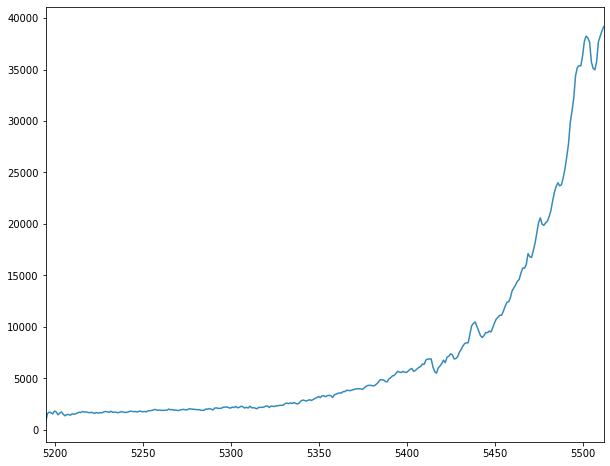

In [96]:
UK['cgdppc'].plot(figsize=(10, 8), color='#348ABD')

Note that the values along the x-axis represent the indices associated with the UK in the sorted `df_mad` `DataFrame`. Wouldn't it be nice if, instead, we could **show the time period** associated with the various unemployment rates for the UK? It might also be interesting to **compare** UK's per capita gdp with its neighbor to the east, Spain.

Let's first create a `DataFrame` that contains gdp per capita for both countries.

In [97]:
uks = df_mad[(df_mad['country'].isin(['United Kingdom', 'Spain']))]

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`.

In [98]:
uks = uks[['year', 'country', 'cgdppc']]
uks.columns = ['Time Period', 'Country', 'GDP per cap']
uks.tail()

,Time Period,Country,GDP per cap
5508,2012.0,United Kingdom,35784.0
5509,2013.0,United Kingdom,37702.0
5510,2014.0,United Kingdom,38220.0
5511,2015.0,United Kingdom,38749.0
5512,2016.0,United Kingdom,39162.0


#### converting from "long" to "wide"

make country gdp the columns!

In [99]:
# step 1, make countries the columns
uks.set_index(['Country','Time Period'],inplace=True) 
# this creates what is called a "multi-index"
uks

GDP per cap
Country        Time Period             
Spain          1.0                973.0
               1300.0            1836.0
               1348.0            1928.0
               1400.0            1740.0
               1500.0            1797.0
...                                 ...
United Kingdom 2012.0           35784.0
               2013.0           37702.0
               2014.0           38220.0
               2015.0           38749.0
               2016.0           39162.0

[496 rows x 1 columns]

In [100]:
# step 2
# level 0 = country, level 1 = year in multi-index
# "unstack" applied to index level makes that level into a sub-column for each existing column variable
uks=uks.unstack(level=0)
uks

GDP per cap               
Country           Spain United Kingdom
Time Period                           
1.0               973.0            NaN
1000.0              NaN          759.0
1300.0           1836.0            NaN
1348.0           1928.0            NaN
1400.0           1740.0            NaN
...                 ...            ...
2012.0          31491.0        35784.0
2013.0          31527.0        37702.0
2014.0          32300.0        38220.0
2015.0          33376.0        38749.0
2016.0          31556.0        39162.0

[326 rows x 2 columns]

In [101]:
# step 3 replace multi-level column names with single level column names
# Pandas Index function takes set of multidimensional index names and makes an index
# .str.join() method concatenates multidimensional array of string column names with character inserted
uks.columns=pd.Index(uks.columns).str.join('_')
uks

,GDP per cap_Spain,GDP per cap_United Kingdom
Time Period,,
1.0,973.0,NaN
1000.0,NaN,759.0
1300.0,1836.0,NaN
1348.0,1928.0,NaN
1400.0,1740.0,NaN
...,...,...
2012.0,31491.0,35784.0
2013.0,31527.0,37702.0
2014.0,32300.0,38220.0


In [102]:
uks.columns=['gdppc_spain','gdppc_uk']

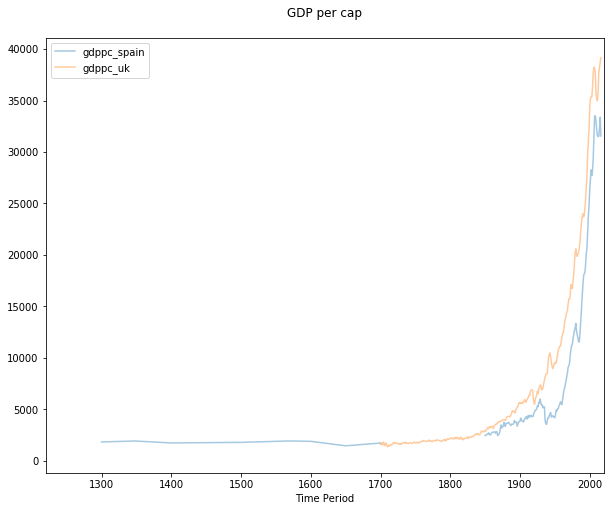

In [103]:
uks.plot(figsize=(10, 8), title='GDP per cap\n',alpha=.4,xlim=(1220,2020))

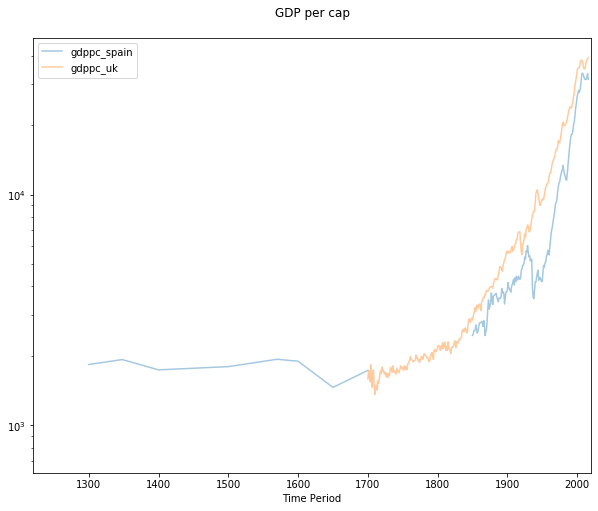

In [104]:
# same with log (ratio) scale
uks.plot(figsize=(10, 8), title='GDP per cap\n',alpha=.4,logy=True,xlim=(1220,2020))

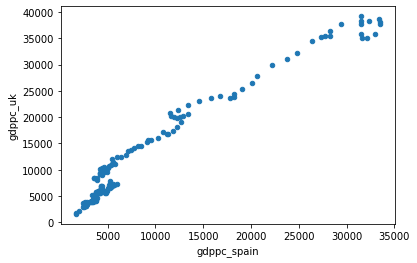

In [105]:
%matplotlib inline
# Let's do a quickie analysis
# first, a default plot
uks.plot(x='gdppc_spain',y='gdppc_uk',kind='scatter')



#### Typical messy plot, UK GDP generally increasing with Spanish GDP per cap, 45 degree line represents parity
UK rose above Spain as the two economies developed, but UK loses ground in modern times (higher GDP per cap levels)

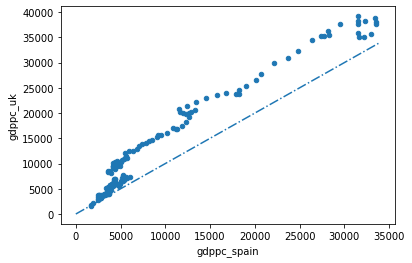

In [106]:
uks.plot(x='gdppc_spain',y='gdppc_uk',kind='scatter')
plt.plot(range(0,35000,1000),range(0,35000,1000),ls='-.')

In [107]:
uks

,gdppc_spain,gdppc_uk
Time Period,,
1.0,973.0,NaN
1000.0,NaN,759.0
1300.0,1836.0,NaN
1348.0,1928.0,NaN
1400.0,1740.0,NaN
...,...,...
2012.0,31491.0,35784.0
2013.0,31527.0,37702.0
2014.0,32300.0,38220.0


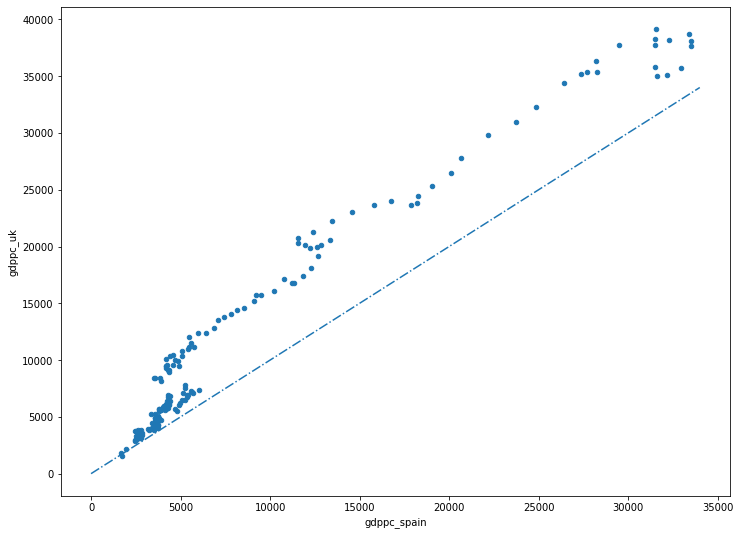

In [108]:
# let's add a fitted 45 degree line
uks=uks.dropna() # drop rows with missing values, np doesn't like missing values
ax=uks.plot(x='gdppc_spain',y='gdppc_uk',kind='scatter',figsize=(12,9))
plt.plot(range(0,35000,1000),range(0,35000,1000),ls='-.');

try adding a fitted regression line!

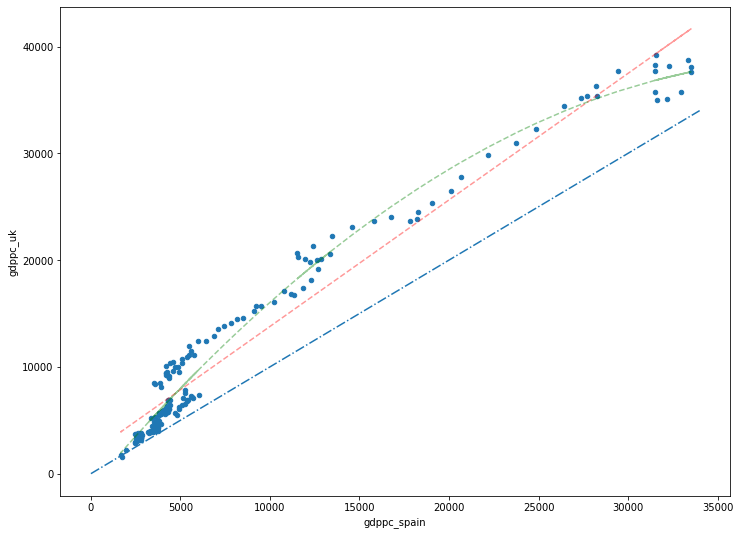

In [109]:
# add a fitted regression line
b,a = np.polyfit(uks.gdppc_spain, uks.gdppc_uk,1) # linear regression line
e,d,c=np.polyfit(uks.gdppc_spain, uks.gdppc_uk,2) # quadratic fit
ax=uks.plot(x='gdppc_spain',y='gdppc_uk',kind='scatter',figsize=(12,9)) ## grab pandas method scatter plot
ax.plot(range(0,35000,1000),range(0,35000,1000),ls='-.') # 45 degree line
ax.plot(uks['gdppc_spain'],(a + b* uks.gdppc_spain),color='red',alpha=.4,ls='--')
ax.plot(uks['gdppc_spain'],(c + d* uks.gdppc_spain+ e*uks.gdppc_spain**2),color='green',alpha=.4,ls='--') ;

In [110]:
# first, need to drop missing values-- statsmodels doesn't like missing values
uks.dropna(axis=0,how='any')

,gdppc_spain,gdppc_uk
Time Period,,
1700.0,1730.0,1591.0
1750.0,1665.0,1782.0
1800.0,1947.0,2205.0
1850.0,2455.0,2858.0
1851.0,2477.0,2953.0
...,...,...
2012.0,31491.0,35784.0
2013.0,31527.0,37702.0
2014.0,32300.0,38220.0


In [111]:
import statsmodels.formula.api as smf
 
mod = smf.ols(" gdppc_uk ~ gdppc_spain",data=uks.dropna(axis=0,how='any')).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               gdppc_uk   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     3767.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):          5.64e-117
Time:                        16:56:42   Log-Likelihood:                -1547.1
No. Observations:                 170   AIC:                             3098.
Df Residuals:                     168   BIC:                             3104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1935.4422    237.094      8.163      

In [112]:
# log linear model
mod = smf.ols(" np.log(gdppc_uk) ~ np.log(gdppc_spain)",data=uks.dropna(axis=0,how='any')).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(gdppc_uk)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2170.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           5.69e-98
Time:                        16:56:50   Log-Likelihood:                 21.823
No. Observations:                 170   AIC:                            -39.65
Df Residuals:                     168   BIC:                            -33.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5081    

In [113]:
# log linear model with robust se's
mod = smf.ols(" np.log(gdppc_uk) ~ np.log(gdppc_spain)",data=uks.dropna(axis=0,how='any')).fit(cov_type='HC3')
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(gdppc_uk)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2796.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):          1.24e-106
Time:                        16:56:52   Log-Likelihood:                 21.823
No. Observations:                 170   AIC:                            -39.65
Df Residuals:                     168   BIC:                            -33.37
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5081    

If you know enough to care about your estimated standard errors, you should look at this:
[Good discussion of standard errors in Python's statsmodels here](https://github.com/vgreg/python-se/blob/master/Standard%20errors%20in%20Python.ipynb)


Pandas documentation [reference](https://pandas.pydata.org/pandas-docs/stable/visualization.html) on visualization in Pandas using plot() method...

A good reference on how to turn this into a thing of beauty. [Randy Olson's how to make beautiful data visualizations in a Jupyter Notebook](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)

Best way to figure out how to do something on a plot:

Go to the official Matplotlib [Gallery](https://matplotlib.org/gallery.html) and take a look. If you click on a plot, you get the code used to create the plot.